In [28]:
%load_ext autoreload
%autoreload 2
from utils import read_df, automl, plot_fig, shap_al, grid_search_df

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [29]:
data_path = r"D:\programs\automl\data\property.csv"
model_path_1 = r"D:\programs\automl\model\property_1"
fig_path_1 = r"D:\programs\automl\fig\property_1.png"
shap_path_1 = r"D:\programs\automl\fig\property_1_shap.png"

model_path_2 = r"D:\programs\automl\model\property_2"
fig_path_2 = r"D:\programs\automl\fig\property_2.png"
shap_path_2 = r"D:\programs\automl\fig\property_2_shap.png"

In [30]:
df = read_df(data_path, n_tgt=2)
df.head()

,feature_1,feature_2,feature_3,feature_7,feature_11,target_1,target_2
0,356.0,441.0,85.7,60.0,33.0,0.215362,0.568912
1,464.0,356.0,95.2,60.0,33.0,0.218843,0.598136
2,314.0,492.0,82.6,60.0,45.0,0.243432,0.631234
3,321.0,486.0,102.0,60.0,45.0,0.267424,0.645461
4,314.0,511.0,85.7,60.0,45.0,0.271747,0.652277


In [31]:
true_1, pred_1, predictor_1 = automl(df, model_path_1, n_tgt=2, tgt="target_1")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.10.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.36 GB / 7.86 GB (17.3%)
Disk Space Avail:   111.65 GB / 375.94 GB (29.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme'  : New in v1.5: The state-of-the-art for tabular data. Massively better than 'best' on datasets <100000 samples by using new Tabular Foundation Models (TFMs) meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, TabDPT, and TabM. Requires a GPU and `pip install autogluon.tabular[tabarena]`


模型已保存至D:\programs\automl\model\property_1


In [32]:
true_2, pred_2, predictor_2 = automl(df, model_path_2, n_tgt=2, tgt="target_2")

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.5.0
Python Version:     3.10.19
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26100
CPU Count:          12
Pytorch Version:    2.9.1+cpu
CUDA Version:       CUDA is not available
Memory Avail:       1.22 GB / 7.86 GB (15.5%)
Disk Space Avail:   111.65 GB / 375.94 GB (29.7%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='extreme'  : New in v1.5: The state-of-the-art for tabular data. Massively better than 'best' on datasets <100000 samples by using new Tabular Foundation Models (TFMs) meta-learned on https://tabarena.ai: TabPFNv2, TabICL, Mitra, TabDPT, and TabM. Requires a GPU and `pip install autogluon.tabular[tabarena]`


模型已保存至D:\programs\automl\model\property_2


RMSE: 0.03910, MAE: 0.02687, R^2: 0.9527


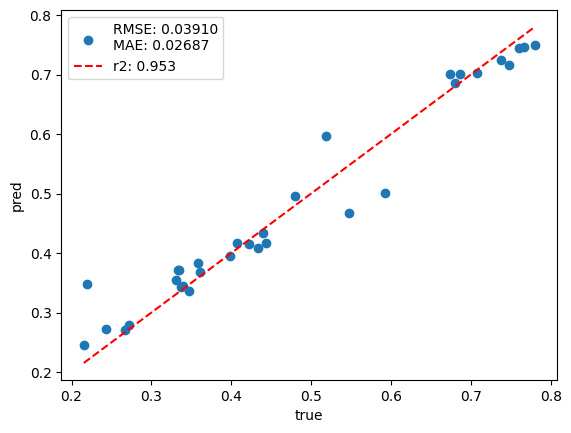

In [33]:
plot_fig(true_1, pred_1, fig_path_1)

RMSE: 0.00979, MAE: 0.00771, R^2: 0.9452


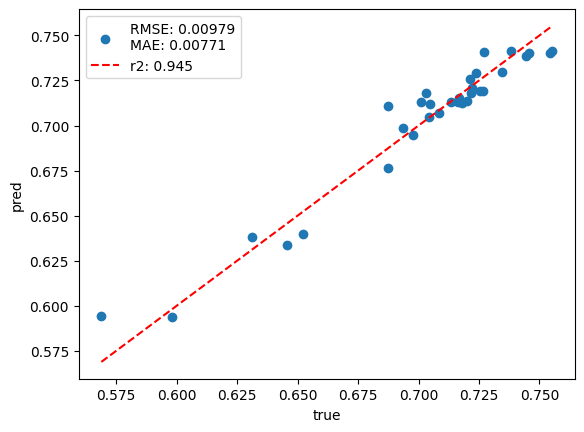

In [34]:
plot_fig(true_2, pred_2, fig_path_2)

  0%|          | 0/32 [00:00<?, ?it/s]

d:\programs\automl\utils.py:84: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_top, df_top, show=False)


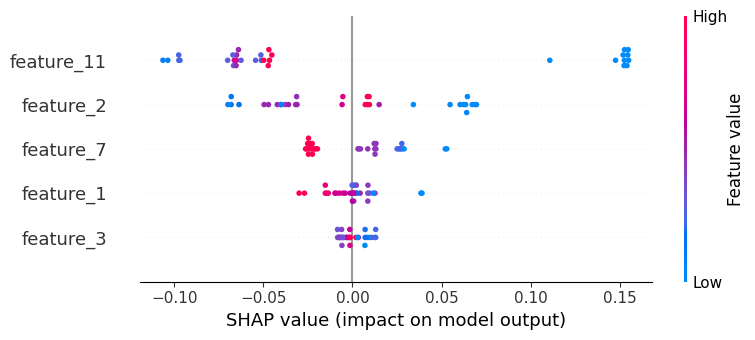

In [35]:
shap_al(predictor_1, df, shap_path_1, n_tgt=2)

  0%|          | 0/32 [00:00<?, ?it/s]

d:\programs\automl\utils.py:84: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_top, df_top, show=False)


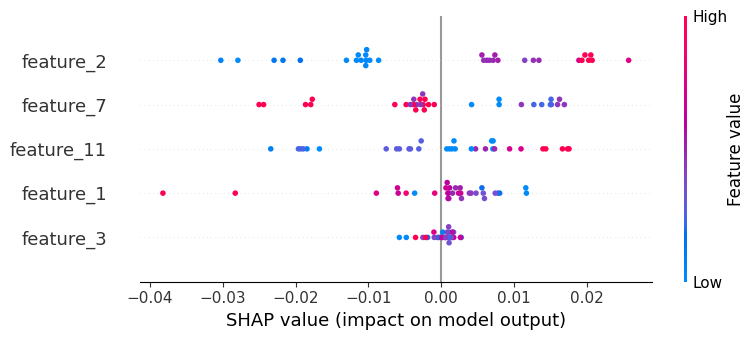

In [36]:
shap_al(predictor_2, df, shap_path_2, n_tgt=2)

In [37]:
candidate = grid_search_df(df.drop(["target_1", "target_2"], axis=1), numeric_samples=10)
candidate.describe()

,feature_1,feature_2,feature_3,feature_7,feature_11
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,325.000000,733.000000,98.350000,45.375000,63.500000
std,88.722022,240.634550,20.201813,9.334961,23.297509
min,186.000000,356.000000,66.700000,30.750000,27.000000
25%,247.777778,523.555556,80.766667,37.250000,43.222222
50%,325.000000,733.000000,98.350000,45.375000,63.500000
75%,402.222222,942.444444,115.933333,53.500000,83.777778
max,464.000000,1110.000000,130.000000,60.000000,100.000000


In [38]:
can_pred_1 = predictor_1.predict(candidate).values
can_pred_2 = predictor_2.predict(candidate).values
candidate["target_1"] = can_pred_1
candidate["target_2"] = can_pred_2
candidate["delta"] = candidate["target_2"] - candidate["target_1"]
candidate.sort_values(by="delta", ascending=False).head()

,feature_1,feature_2,feature_3,feature_7,feature_11,target_1,target_2,delta
52999,340.444444,523.555556,130.000000,60.00,100.000000,0.308085,0.722185,0.414099
52899,340.444444,523.555556,122.966667,60.00,100.000000,0.308567,0.722483,0.413916
51981,340.444444,439.777778,130.000000,56.75,35.111111,0.260782,0.674364,0.413582
52799,340.444444,523.555556,115.933333,60.00,100.000000,0.309161,0.722519,0.413357
51999,340.444444,439.777778,130.000000,60.00,100.000000,0.303268,0.716182,0.412914
